<a href="https://colab.research.google.com/github/danielroa98/Redes-Neuronales/blob/main/A01021960_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries and includes
---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Download and process the data set
---



##### Download from github

In [2]:
!git clone https://github.com/octavio-navarro/DL_Data_sets.git

fatal: destination path 'DL_Data_sets' already exists and is not an empty directory.


In [3]:
# !mkdir DL_Data_sets/German_Traffic_signs/training_set/
# !mkdir DL_Data_sets/German_Traffic_signs/testing_set/

!ls DL_Data_sets/German_Traffic_signs/Images/00001/

00000_00000.ppm  00018_00016.ppm  00037_00002.ppm  00055_00018.ppm
00000_00001.ppm  00018_00017.ppm  00037_00003.ppm  00055_00019.ppm
00000_00002.ppm  00018_00018.ppm  00037_00004.ppm  00055_00020.ppm
00000_00003.ppm  00018_00019.ppm  00037_00005.ppm  00055_00021.ppm
00000_00004.ppm  00018_00020.ppm  00037_00006.ppm  00055_00022.ppm
00000_00005.ppm  00018_00021.ppm  00037_00007.ppm  00055_00023.ppm
00000_00006.ppm  00018_00022.ppm  00037_00008.ppm  00055_00024.ppm
00000_00007.ppm  00018_00023.ppm  00037_00009.ppm  00055_00025.ppm
00000_00008.ppm  00018_00024.ppm  00037_00010.ppm  00055_00026.ppm
00000_00009.ppm  00018_00025.ppm  00037_00011.ppm  00055_00027.ppm
00000_00010.ppm  00018_00026.ppm  00037_00012.ppm  00055_00028.ppm
00000_00011.ppm  00018_00027.ppm  00037_00013.ppm  00055_00029.ppm
00000_00012.ppm  00018_00028.ppm  00037_00014.ppm  00056_00000.ppm
00000_00013.ppm  00018_00029.ppm  00037_00015.ppm  00056_00001.ppm
00000_00014.ppm  00019_00000.ppm  00037_00016.ppm  00056_00002

##### Show an image from the data set

(30, 29, 3)


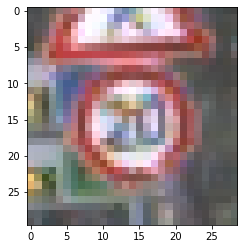

In [4]:
# TODO: Plot an image from the dataset using matplotlib
sign_img = cv2.imread('DL_Data_sets/German_Traffic_signs/Images/00000/00000_00000.ppm')
sign_img = cv2.cvtColor(sign_img, cv2.COLOR_BGR2RGB)

print(sign_img.shape)
plt.imshow(sign_img)

##### Separates the data into different folders

In [5]:
import os, glob, random, math
from shutil import copyfile

# TODO: Check out glob and copyfile, and create the test and train folders as needed. Each of the folders must have folders for each of the categories.
allCategories = glob.glob('DL_Data_sets/German_Traffic_signs/Images/**')

os.mkdir('DL_Data_sets/German_Traffic_signs/training_set/')
os.mkdir('DL_Data_sets/German_Traffic_signs/testing_set/')

for category in allCategories:
  print(os.path.basename(category))
  os.mkdir('DL_Data_sets/German_Traffic_signs/training_set/'+os.path.basename(category))
  os.mkdir('DL_Data_sets/German_Traffic_signs/testing_set/'+os.path.basename(category))

FileExistsError: ignored

In [6]:
!ls DL_Data_sets/German_Traffic_signs/training_set/
!ls DL_Data_sets/German_Traffic_signs/testing_set/

00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039
00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039


In [ ]:
for category in allCategories:
  imageCounter = 0.0
  currDir = os.path.basename(category)
  
  images = glob.glob('DL_Data_sets/German_Traffic_signs/Images/'+currDir+'/**.ppm')

  for image in images:
  
    trainingDestination = 'DL_Data_sets/German_Traffic_signs/training_set/'+currDir+'/'+os.path.basename(image)
    testingDestination = 'DL_Data_sets/German_Traffic_signs/testing_set/'+currDir+'/'+os.path.basename(image)

    # Checking if the 80% of the images from a specific directory are being sent to the training folder
    if imageCounter < (len(images) * .80):
      copyfile(image, trainingDestination)
    # Else sends the remaining 20% to the testing folder
    else:
      copyfile(image, testingDestination)

    imageCounter += 1

In [7]:
!ls DL_Data_sets/German_Traffic_signs/testing_set/00000/
print('\n')
!ls DL_Data_sets/German_Traffic_signs/training_set/00000/

00000_00001.ppm  00002_00004.ppm  00003_00024.ppm  00005_00020.ppm
00000_00009.ppm  00002_00014.ppm  00004_00003.ppm  00005_00022.ppm
00000_00010.ppm  00002_00018.ppm  00004_00009.ppm  00005_00027.ppm
00000_00014.ppm  00002_00021.ppm  00004_00026.ppm  00006_00004.ppm
00000_00025.ppm  00002_00022.ppm  00004_00029.ppm  00006_00012.ppm
00001_00000.ppm  00002_00028.ppm  00005_00002.ppm  00006_00017.ppm
00001_00007.ppm  00003_00002.ppm  00005_00003.ppm  00006_00019.ppm
00001_00015.ppm  00003_00006.ppm  00005_00004.ppm  00006_00025.ppm
00001_00016.ppm  00003_00012.ppm  00005_00006.ppm  00006_00026.ppm
00001_00017.ppm  00003_00018.ppm  00005_00009.ppm
00002_00001.ppm  00003_00020.ppm  00005_00014.ppm


00000_00000.ppm  00001_00022.ppm  00003_00014.ppm  00005_00007.ppm
00000_00002.ppm  00001_00023.ppm  00003_00015.ppm  00005_00008.ppm
00000_00003.ppm  00001_00024.ppm  00003_00016.ppm  00005_00010.ppm
00000_00004.ppm  00001_00025.ppm  00003_00017.ppm  00005_00011.ppm
00000_00005.ppm  00001_0002

## Model definition and training
---

##### Define and compile a model to classify the images. You can look at other models for inspiration.

In [81]:
# TODO: Define a model to classify the images. Don't forget to show its summary and compile it.
network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
network.add(layers.Dense(1024, activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Flatten())

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(43, activation='softmax'))

network.summary()

network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# network.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# network.compile(optimizer=optimizers.SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
dense_30 (Dense)             (None, 98, 98, 1024)      33792     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 49, 49, 1024)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 47, 47, 64)        589888    
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 10, 10, 128)     

#### Add data agumentation to the data set.

##### Define the image data generator. Define transformations that make sense for the data set.

In [82]:
# TODO: Define an image data generator for training and for testing.
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    fill_mode = 'nearest',
)

test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

##### Define the train, validation, and test generators

In [83]:
# TODO: Create generators for training, validation, and testing.
trainGenerator = train_data_generator.flow_from_directory(
    'DL_Data_sets/German_Traffic_signs/training_set/',
    target_size = (100, 100),
    batch_size = 20,
    class_mode = 'categorical',
    subset='training'
)

validationGenerator = train_data_generator.flow_from_directory(
    'DL_Data_sets/German_Traffic_signs/training_set/',
    target_size = (100, 100),
    batch_size = 20,
    class_mode = 'categorical',
    subset='validation'
)

testingGenerator = test_data_generator.flow_from_directory(
    'DL_Data_sets/German_Traffic_signs/testing_set/',
    target_size = (100, 100),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 28250 images belonging to 43 classes.
Found 3118 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


##### Using matplotlib, visualize images from the test generator. Create a figure of 20 images, with 5 images per row.

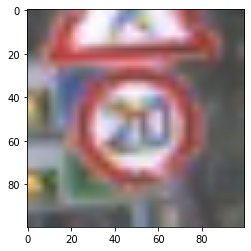

In [84]:
dataTest = 'DL_Data_sets/German_Traffic_signs/training_set/00000/'
img_path = dataTest +'00000_00000.ppm'

sign_img = cv2.imread(img_path)
sign_img = cv2.cvtColor(sign_img, cv2.COLOR_BGR2RGB)
sign_img = cv2.resize(sign_img, dsize=(100, 100))

plt.imshow(sign_img)

(1, 100, 100, 3)


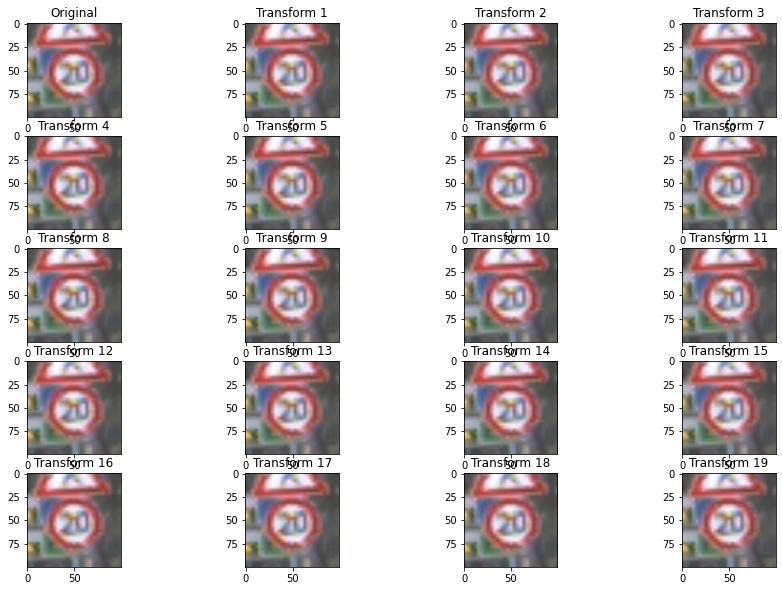

In [85]:
# TODO: Create a figure with images from the test generator.
# print(sign_img.shape)
sign_tensor = np.reshape(sign_img, (1, 100, 100, 3))
print(sign_tensor.shape)

plt.figure(figsize=(15, 10))
plt.subplot(5, 4, 1)
plt.title('Original')
plt.imshow(sign_img)

index = 1
for batch in test_data_generator.flow(sign_tensor, batch_size=1):
  plt.subplot(5, 4, index+1)
  plt.title(f'Transform {index}')
  plt.imshow(batch[0])
  index += 1

  if index % 20 == 0:
    break

plt.show()

  ##### Train the model using the generators. Investigate what 'Early stopping' is, and implement it for the training. Don't forget to use a GPU for training.

In [86]:
# TODO: Train the model. Remember to use Early stopping.
es = EarlyStopping(monitor='val_loss', restore_best_weights='patience')

cbs = [es]                                           

history = network.fit(
    trainGenerator,
    epochs = 30,
    validation_data = validationGenerator,
    steps_per_epoch = 100,
    validation_steps = 50,
    # callbacks=cbs
)

Epoch 1/30
100/100 [==============================] - 17s 157ms/step - loss: 3.5180 - accuracy: 0.0850 - val_loss: 3.3760 - val_accuracy: 0.0950
Epoch 2/30
100/100 [==============================] - 15s 154ms/step - loss: 3.1054 - accuracy: 0.1680 - val_loss: 3.0498 - val_accuracy: 0.2190
Epoch 3/30
100/100 [==============================] - 15s 155ms/step - loss: 2.2991 - accuracy: 0.3650 - val_loss: 2.2138 - val_accuracy: 0.3730
Epoch 4/30
100/100 [==============================] - 15s 154ms/step - loss: 1.6791 - accuracy: 0.4835 - val_loss: 1.7922 - val_accuracy: 0.4710
Epoch 5/30
100/100 [==============================] - 15s 155ms/step - loss: 1.3412 - accuracy: 0.5770 - val_loss: 1.4248 - val_accuracy: 0.6070
Epoch 6/30
100/100 [==============================] - 16s 155ms/step - loss: 1.0068 - accuracy: 0.6935 - val_loss: 1.1841 - val_accuracy: 0.6580
Epoch 7/30
100/100 [==============================] - 16s 156ms/step - loss: 0.8269 - accuracy: 0.7435 - val_loss: 1.0489 - val_ac

## Model evaluation
---

##### Evaluate the performance of the model with the test generator.

In [87]:
# TODO: Evaluate the model, and print the results.
''' test_results = network.evaluate(test_imgs_standard, test_labels_standard)
print(test_results) '''

' test_results = network.evaluate(test_imgs_standard, test_labels_standard)\nprint(test_results) '

##### Plot the results of training: plot training and validation accuracy, and loss.

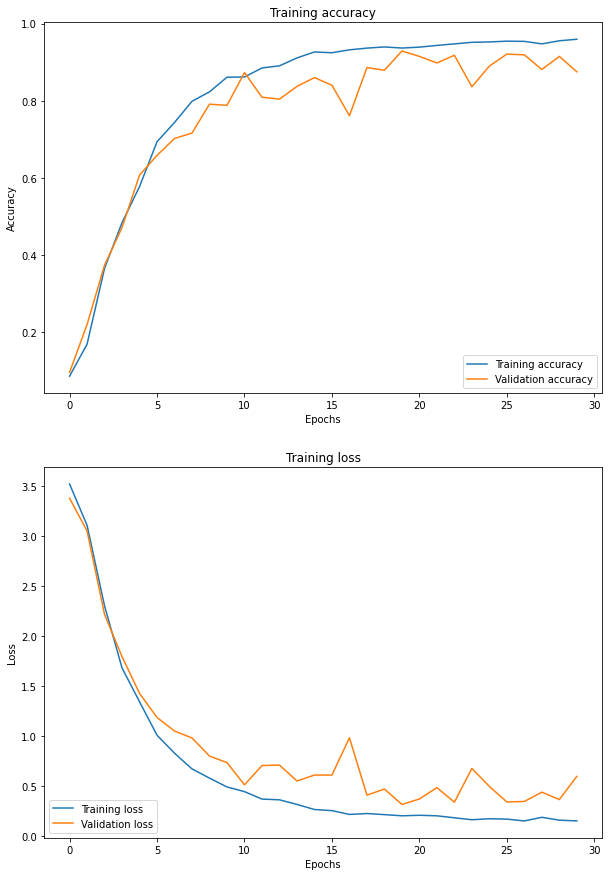

In [88]:
# TODO: Plot the results of the training and validation accuracy.
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# TODO: Plot the results of the training and validation loss.
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')